In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

importing libraries

In [2]:
ARD=pd.read_csv('Australian_Road_Deaths.csv')
ARD

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
0,20212133,Vic,202109,Sunday,0:30:00,Single,NaN,NaN,NaN,Motorcycle rider,...,89,12,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Night
1,20214022,SA,202109,Saturday,23:31:00,Multiple,No,No,No,Pedestrian,...,0,6,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Night
2,20212096,Vic,202109,Saturday,23:00:00,Single,NaN,NaN,NaN,Car passenger,...,0,2,Inner Regional Australia,Hume,Wangaratta (RC),Access Road,No,No,17_to_25,Night
3,20212145,Vic,202109,Saturday,22:25:00,Single,NaN,NaN,NaN,Car driver,...,117,5,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Night
4,20212075,Vic,202109,Saturday,5:15:00,Single,NaN,NaN,NaN,Motorcycle rider,...,92,11,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,20142068,Vic,201401,Monday,18:20:00,Single,No,No,No,Car passenger,...,0,6,NaN,NaN,NaN,NaN,No,No,26_to_39,Night
9136,20141285,NSW,201401,Tuesday,20:50:00,Single,No,No,No,Car driver,...,91,43,NaN,NaN,NaN,NaN,No,No,65_to_74,Night
9137,20143125,Qld,201401,Friday,1:00:00,Single,No,No,No,Motorcycle pillion Car passenger,...,0,1,NaN,NaN,NaN,NaN,No,No,17_to_25,Night
9138,20143065,Qld,201401,Friday,10:00:00,Multiple,No,No,Yes,Car driver,...,75,12,NaN,NaN,NaN,NaN,No,No,26_to_39,Day


In [3]:
ARD.shape #9140 rows 22 collumns

(9140, 22)

A1: 9140 rows 22 collumns

In [4]:
types_NRA= len(pd.unique(ARD['National Remoteness Areas']))
print('There are',types_NRA,'types of NRA')

There are 6 types of NRA


A2: There are 6 types of NRA

In [5]:
types_SA4= len(pd.unique(ARD['SA4 Name 2016']))
print('There are',types_NRA,'SA4 Name 2016')

There are 6 SA4 Name 2016


A2: There are 6 SA4 Name 2016

In [6]:
types_LGA= len(pd.unique(ARD['National LGA Name 2017']))
print('There are',types_NRA,'National LGA Name 2017')

There are 6 National LGA Name 2017


A2: There are 6 National LGA Name 2017

In [7]:
types_NRT= len(pd.unique(ARD['National Road Type']))
print('There are',types_NRA,'National Road Type')

There are 6 National Road Type


A2: There are 6 National Road Type

In [8]:
ARD.isnull()

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
0,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False
9136,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False
9137,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False
9138,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False


In [9]:
#df.isna().any(axis=1).sum()
ARD.isna().any(axis=1).sum()

2287

counting rows with null value

In [10]:
ARD = ARD.replace('Unspecified', np.nan, regex=True) #replacing unspecified values with nan
ARD

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
0,20212133,Vic,202109,Sunday,0:30:00,Single,NaN,NaN,NaN,Motorcycle rider,...,89,12,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Night
1,20214022,SA,202109,Saturday,23:31:00,Multiple,No,No,No,Pedestrian,...,0,6,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Night
2,20212096,Vic,202109,Saturday,23:00:00,Single,NaN,NaN,NaN,Car passenger,...,0,2,Inner Regional Australia,Hume,Wangaratta (RC),Access Road,No,No,17_to_25,Night
3,20212145,Vic,202109,Saturday,22:25:00,Single,NaN,NaN,NaN,Car driver,...,117,5,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Night
4,20212075,Vic,202109,Saturday,5:15:00,Single,NaN,NaN,NaN,Motorcycle rider,...,92,11,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,20142068,Vic,201401,Monday,18:20:00,Single,No,No,No,Car passenger,...,0,6,NaN,NaN,NaN,NaN,No,No,26_to_39,Night
9136,20141285,NSW,201401,Tuesday,20:50:00,Single,No,No,No,Car driver,...,91,43,NaN,NaN,NaN,NaN,No,No,65_to_74,Night
9137,20143125,Qld,201401,Friday,1:00:00,Single,No,No,No,Motorcycle pillion Car passenger,...,0,1,NaN,NaN,NaN,NaN,No,No,17_to_25,Night
9138,20143065,Qld,201401,Friday,10:00:00,Multiple,No,No,Yes,Car driver,...,75,12,NaN,NaN,NaN,NaN,No,No,26_to_39,Day


In [11]:
ARD.isna().any(axis=1).sum()

2287

In [12]:
ARD = ARD.replace('Undetermined', np.nan, regex=True)
ARD

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
0,20212133,Vic,202109,Sunday,0:30:00,Single,NaN,NaN,NaN,Motorcycle rider,...,89,12,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Night
1,20214022,SA,202109,Saturday,23:31:00,Multiple,No,No,No,Pedestrian,...,0,6,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Night
2,20212096,Vic,202109,Saturday,23:00:00,Single,NaN,NaN,NaN,Car passenger,...,0,2,Inner Regional Australia,Hume,Wangaratta (RC),Access Road,No,No,17_to_25,Night
3,20212145,Vic,202109,Saturday,22:25:00,Single,NaN,NaN,NaN,Car driver,...,117,5,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Night
4,20212075,Vic,202109,Saturday,5:15:00,Single,NaN,NaN,NaN,Motorcycle rider,...,92,11,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,20142068,Vic,201401,Monday,18:20:00,Single,No,No,No,Car passenger,...,0,6,NaN,NaN,NaN,NaN,No,No,26_to_39,Night
9136,20141285,NSW,201401,Tuesday,20:50:00,Single,No,No,No,Car driver,...,91,43,NaN,NaN,NaN,NaN,No,No,65_to_74,Night
9137,20143125,Qld,201401,Friday,1:00:00,Single,No,No,No,Motorcycle pillion Car passenger,...,0,1,NaN,NaN,NaN,NaN,No,No,17_to_25,Night
9138,20143065,Qld,201401,Friday,10:00:00,Multiple,No,No,Yes,Car driver,...,75,12,NaN,NaN,NaN,NaN,No,No,26_to_39,Day


In [13]:
ARD.isna().any(axis=1).sum()

2302

A3: 2302 rows with missing values

In [14]:
ARD['YYYYMM']=ARD['YYYYMM'].map(str) #turning YYYYMM to string

In [15]:
ARD['Month']=ARD['YYYYMM'].str[-2:]
ARD

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Month
0,20212133,Vic,202109,Sunday,0:30:00,Single,NaN,NaN,NaN,Motorcycle rider,...,12,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Night,09
1,20214022,SA,202109,Saturday,23:31:00,Multiple,No,No,No,Pedestrian,...,6,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Night,09
2,20212096,Vic,202109,Saturday,23:00:00,Single,NaN,NaN,NaN,Car passenger,...,2,Inner Regional Australia,Hume,Wangaratta (RC),Access Road,No,No,17_to_25,Night,09
3,20212145,Vic,202109,Saturday,22:25:00,Single,NaN,NaN,NaN,Car driver,...,5,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Night,09
4,20212075,Vic,202109,Saturday,5:15:00,Single,NaN,NaN,NaN,Motorcycle rider,...,11,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Night,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,20142068,Vic,201401,Monday,18:20:00,Single,No,No,No,Car passenger,...,6,NaN,NaN,NaN,NaN,No,No,26_to_39,Night,01
9136,20141285,NSW,201401,Tuesday,20:50:00,Single,No,No,No,Car driver,...,43,NaN,NaN,NaN,NaN,No,No,65_to_74,Night,01
9137,20143125,Qld,201401,Friday,1:00:00,Single,No,No,No,Motorcycle pillion Car passenger,...,1,NaN,NaN,NaN,NaN,No,No,17_to_25,Night,01
9138,20143065,Qld,201401,Friday,10:00:00,Multiple,No,No,Yes,Car driver,...,12,NaN,NaN,NaN,NaN,No,No,26_to_39,Day,01


In [16]:
null_ARD=ARD[ARD.isnull().any(axis=1)]
null_ARD

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Month
0,20212133,Vic,202109,Sunday,0:30:00,Single,NaN,NaN,NaN,Motorcycle rider,...,12,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Night,09
1,20214022,SA,202109,Saturday,23:31:00,Multiple,No,No,No,Pedestrian,...,6,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Night,09
2,20212096,Vic,202109,Saturday,23:00:00,Single,NaN,NaN,NaN,Car passenger,...,2,Inner Regional Australia,Hume,Wangaratta (RC),Access Road,No,No,17_to_25,Night,09
3,20212145,Vic,202109,Saturday,22:25:00,Single,NaN,NaN,NaN,Car driver,...,5,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Night,09
4,20212075,Vic,202109,Saturday,5:15:00,Single,NaN,NaN,NaN,Motorcycle rider,...,11,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Night,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,20142068,Vic,201401,Monday,18:20:00,Single,No,No,No,Car passenger,...,6,NaN,NaN,NaN,NaN,No,No,26_to_39,Night,01
9136,20141285,NSW,201401,Tuesday,20:50:00,Single,No,No,No,Car driver,...,43,NaN,NaN,NaN,NaN,No,No,65_to_74,Night,01
9137,20143125,Qld,201401,Friday,1:00:00,Single,No,No,No,Motorcycle pillion Car passenger,...,1,NaN,NaN,NaN,NaN,No,No,17_to_25,Night,01
9138,20143065,Qld,201401,Friday,10:00:00,Multiple,No,No,Yes,Car driver,...,12,NaN,NaN,NaN,NaN,No,No,26_to_39,Day,01


In [17]:
null_ARD['Month'].unique() #these are the months with missing values

array(['09', '08', '07', '06', '05', '04', '03', '02', '01', '12', '11',
       '10'], dtype=object)

A3 2: It looks like every month has a missing value

In [18]:
ARD=ARD.dropna()
ARD

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Month
5,20213034,Qld,202109,Saturday,4:00:00,Multiple,No,No,No,Motorcycle rider,...,3,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night,09
8,20213026,Qld,202109,Wednesday,23:00:00,Multiple,No,No,No,Car passenger,...,3,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night,09
9,20213092,Qld,202109,Saturday,2:00:00,Single,No,No,No,Car driver,...,12,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night,09
10,20214053,SA,202109,Thursday,21:00:00,Single,No,No,No,Car driver,...,7,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night,09
11,20213178,Qld,202109,Sunday,21:00:00,Multiple,No,No,No,Motorcycle rider,...,29,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9106,20144083,SA,201401,Friday,11:10:00,Multiple,No,Yes,No,Car passenger,...,14,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day,01
9112,20145108,WA,201401,Wednesday,11:47:00,Single,No,No,No,Motorcycle rider,...,15,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day,01
9121,20144022,SA,201401,Monday,9:35:00,Single,No,No,No,Pedestrian,...,45,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day,01
9129,20145072,WA,201401,Tuesday,21:30:00,Single,No,No,No,Car driver,...,43,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night,01


A3 3: Removing every rows with a missing value

In [19]:
ARD=ARD.drop_duplicates()
ARD

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Month
5,20213034,Qld,202109,Saturday,4:00:00,Multiple,No,No,No,Motorcycle rider,...,3,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night,09
8,20213026,Qld,202109,Wednesday,23:00:00,Multiple,No,No,No,Car passenger,...,3,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night,09
9,20213092,Qld,202109,Saturday,2:00:00,Single,No,No,No,Car driver,...,12,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night,09
10,20214053,SA,202109,Thursday,21:00:00,Single,No,No,No,Car driver,...,7,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night,09
11,20213178,Qld,202109,Sunday,21:00:00,Multiple,No,No,No,Motorcycle rider,...,29,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9106,20144083,SA,201401,Friday,11:10:00,Multiple,No,Yes,No,Car passenger,...,14,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day,01
9112,20145108,WA,201401,Wednesday,11:47:00,Single,No,No,No,Motorcycle rider,...,15,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day,01
9121,20144022,SA,201401,Monday,9:35:00,Single,No,No,No,Pedestrian,...,45,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day,01
9129,20145072,WA,201401,Tuesday,21:30:00,Single,No,No,No,Car driver,...,43,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night,01


A3 4: Removing duplicates

In [20]:
ARD['Month'].value_counts(ascending=True)

02    514
11    517
10    530
09    531
05    554
06    556
12    565
04    575
01    593
07    596
08    637
03    654
Name: Month, dtype: int64

A4: month with most crashes are February and November

In [21]:
ARD['Year']=ARD['YYYYMM'].str[:4]
ARD

C:\Users\Edward Priyatna\AppData\Local\Temp\ipykernel_9996\3597612399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ARD['Year']=ARD['YYYYMM'].str[:4]


,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Month,Year
5,20213034,Qld,202109,Saturday,4:00:00,Multiple,No,No,No,Motorcycle rider,...,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night,09,2021
8,20213026,Qld,202109,Wednesday,23:00:00,Multiple,No,No,No,Car passenger,...,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night,09,2021
9,20213092,Qld,202109,Saturday,2:00:00,Single,No,No,No,Car driver,...,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night,09,2021
10,20214053,SA,202109,Thursday,21:00:00,Single,No,No,No,Car driver,...,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night,09,2021
11,20213178,Qld,202109,Sunday,21:00:00,Multiple,No,No,No,Motorcycle rider,...,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night,09,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9106,20144083,SA,201401,Friday,11:10:00,Multiple,No,Yes,No,Car passenger,...,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day,01,2014
9112,20145108,WA,201401,Wednesday,11:47:00,Single,No,No,No,Motorcycle rider,...,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day,01,2014
9121,20144022,SA,201401,Monday,9:35:00,Single,No,No,No,Pedestrian,...,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day,01,2014
9129,20145072,WA,201401,Tuesday,21:30:00,Single,No,No,No,Car driver,...,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night,01,2014


A5 1A: extracting month and year as separate collumn

In [22]:
ARD_crash_car_driver=ARD.loc[ ( ARD['Road User']=='Car driver' )  ]
ARD_crash_car_driver

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Month,Year
9,20213092,Qld,202109,Saturday,2:00:00,Single,No,No,No,Car driver,...,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night,09,2021
10,20214053,SA,202109,Thursday,21:00:00,Single,No,No,No,Car driver,...,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night,09,2021
13,20211068,NSW,202109,Tuesday,21:50:00,Single,No,No,No,Car driver,...,Inner Regional Australia,Central Coast,Central Coast,Arterial Road,No,No,26_to_39,Night,09,2021
14,20213026,Qld,202109,Wednesday,23:00:00,Multiple,No,No,No,Car driver,...,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,26_to_39,Night,09,2021
17,20213169,Qld,202109,Sunday,13:00:00,Single,No,No,No,Car driver,...,Outer Regional Australia,Wide Bay,South Burnett (R),Sub-Arterial Road,No,No,40_to_64,Day,09,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9054,20144013,SA,201401,Saturday,1:00:00,Single,No,No,Yes,Car driver,...,Major Cities of Australia,Adelaide - Central and Hills,Unley (C),National or State Highway,No,No,40_to_64,Night,01,2014
9092,20144079,SA,201401,Thursday,14:40:00,Multiple,No,No,Yes,Car driver,...,Outer Regional Australia,South Australia - South East,Wattle Range (DC),National or State Highway,No,No,26_to_39,Day,01,2014
9094,20144019,SA,201401,Friday,14:40:00,Multiple,No,No,No,Car driver,...,Inner Regional Australia,South Australia - South East,Alexandrina (DC),National or State Highway,No,No,26_to_39,Day,01,2014
9105,20144083,SA,201401,Friday,11:10:00,Multiple,No,Yes,No,Car driver,...,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day,01,2014


A5 1A: extracting road users equals to car drivers

In [23]:
ARD_crash_car_driver_year_month=ARD_crash_car_driver.groupby(['Year', 'Month']).size()
ARD_crash_car_driver_year_month

Year  Month
2014  01        7
      02       10
      03       12
      04        9
      05        6
               ..
2021  05       33
      06       41
      07       43
      08       39
      09       21
Length: 93, dtype: int64

In [24]:
ARD_crash_car_driver_year_month.to_csv('ARD_crash_car_driver_year_month.csv')

In [25]:
ARD_crash_car_driver_year_month=pd.read_csv('ARD_crash_car_driver_year_month.csv')
ARD_crash_car_driver_year_month.head(30)

,Year,Month,0
0,2014,1,7
1,2014,2,10
2,2014,3,12
3,2014,4,9
4,2014,5,6
5,2014,6,14
6,2014,7,11
7,2014,8,15
8,2014,9,10
9,2014,10,12


A5 1B: To see it fully, open 'ARD_crash_car_driver_year_month.csv'. Year is col 0, month is col 1, crash for each month by year is col 2.

In [26]:
ARD_crash_car_driver_month_count=ARD_crash_car_driver['Month'].value_counts().sort_index()
ARD_crash_car_driver_month_count

01    275
02    230
03    314
04    267
05    262
06    268
07    272
08    310
09    274
10    246
11    245
12    271
Name: Month, dtype: int64

In [27]:
ARD_crash_car_driver_month_AVG=ARD_crash_car_driver_month_count/7
ARD_crash_car_driver_month_AVG

01    39.285714
02    32.857143
03    44.857143
04    38.142857
05    37.428571
06    38.285714
07    38.857143
08    44.285714
09    39.142857
10    35.142857
11    35.000000
12    38.714286
Name: Month, dtype: float64

A5 1C

Text(0, 0.5, 'Average crashes per month')

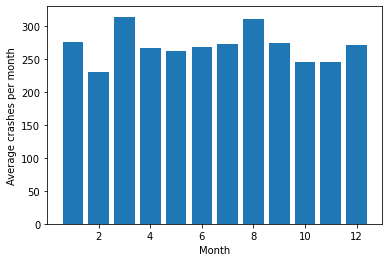

In [28]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],ARD_crash_car_driver_month_count)
plt.xlabel('Month')
plt.ylabel('Average crashes per month')

A5 2
A5 3: There is not much variance between crashes per month

In [29]:
Avg_speed_CD=ARD_crash_car_driver.groupby(['National Road Type'])['Speed'].agg(x='mean')
Avg_speed_CD

,x
National Road Type,
Access Road,89.785714
Arterial Road,88.571262
Collector Road,92.652439
Local Road,91.803957
National or State Highway,109.177102
Pedestrian Thoroughfare,103.000000
Sub-Arterial Road,88.595573


Text(0, 0.5, 'Average speed')

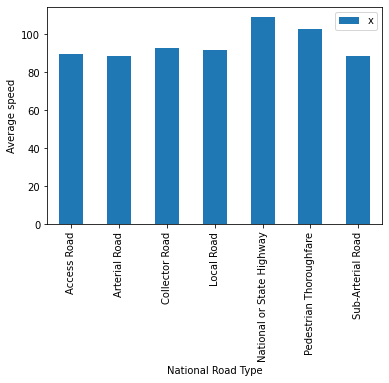

In [30]:
Avg_speed_CD.plot.bar(rot=0)
plt.xticks(rotation=90)
plt.ylabel('Average speed')

A6 1

In [31]:
ARD['Age'].unique() #replace -999

array([  19,    2,   47,   24,   52,   32,   34,   26,   11,   46,   36,
         71,   31,   86,   37, -999,   64,   20,   74,   70,   68,    6,
         84,   63,   77,   10,   38,   39,    4,   90,   35,   49,   45,
         59,   27,   40,   60,   18,   85,   29,   58,   48,   51,   67,
         50,    8,   79,   83,   75,   41,   16,   69,   25,   76,   82,
         15,   80,   17,   22,   30,   28,   33,   55,   56,   12,   44,
         61,   54,    7,    5,   73,   66,    9,   57,   53,   23,   81,
         78,   87,   21,   43,   13,   65,   72,    1,   89,   14,   88,
         62,   91,   93,    0,   42,    3,   94,   92,   97,  101,   95,
         99,   96,   98], dtype=int64)

In [32]:
ARD=ARD.copy()
ARD.loc[ ARD['Age']<ARD['Driving experience'],'Age'  ]=0 #replacing counter intuitive values with 0
ARD

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Month,Year
5,20213034,Qld,202109,Saturday,4:00:00,Multiple,No,No,No,Motorcycle rider,...,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night,09,2021
8,20213026,Qld,202109,Wednesday,23:00:00,Multiple,No,No,No,Car passenger,...,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night,09,2021
9,20213092,Qld,202109,Saturday,2:00:00,Single,No,No,No,Car driver,...,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night,09,2021
10,20214053,SA,202109,Thursday,21:00:00,Single,No,No,No,Car driver,...,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night,09,2021
11,20213178,Qld,202109,Sunday,21:00:00,Multiple,No,No,No,Motorcycle rider,...,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night,09,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9106,20144083,SA,201401,Friday,11:10:00,Multiple,No,Yes,No,Car passenger,...,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day,01,2014
9112,20145108,WA,201401,Wednesday,11:47:00,Single,No,No,No,Motorcycle rider,...,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day,01,2014
9121,20144022,SA,201401,Monday,9:35:00,Single,No,No,No,Pedestrian,...,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day,01,2014
9129,20145072,WA,201401,Tuesday,21:30:00,Single,No,No,No,Car driver,...,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night,01,2014


In [33]:
ARD=ARD.copy()
ARD.loc[ ARD['Age']== -999,'Age'  ]=0 #replacing age=-999 to 0
ARD

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day,Month,Year
5,20213034,Qld,202109,Saturday,4:00:00,Multiple,No,No,No,Motorcycle rider,...,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night,09,2021
8,20213026,Qld,202109,Wednesday,23:00:00,Multiple,No,No,No,Car passenger,...,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night,09,2021
9,20213092,Qld,202109,Saturday,2:00:00,Single,No,No,No,Car driver,...,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night,09,2021
10,20214053,SA,202109,Thursday,21:00:00,Single,No,No,No,Car driver,...,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night,09,2021
11,20213178,Qld,202109,Sunday,21:00:00,Multiple,No,No,No,Motorcycle rider,...,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night,09,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9106,20144083,SA,201401,Friday,11:10:00,Multiple,No,Yes,No,Car passenger,...,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day,01,2014
9112,20145108,WA,201401,Wednesday,11:47:00,Single,No,No,No,Motorcycle rider,...,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day,01,2014
9121,20144022,SA,201401,Monday,9:35:00,Single,No,No,No,Pedestrian,...,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day,01,2014
9129,20145072,WA,201401,Tuesday,21:30:00,Single,No,No,No,Car driver,...,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night,01,2014


In [34]:
ARD7A={'Road User':ARD['Road User'],'Age':ARD['Age'],'Speed':ARD['Speed'],'Driving experience':ARD['Driving experience']}
ARD7A=pd.DataFrame(ARD7A)
ARD7A

,Road User,Age,Speed,Driving experience
5,Motorcycle rider,19,41,3
8,Car passenger,0,20,3
9,Car driver,47,53,12
10,Car driver,24,140,7
11,Motorcycle rider,52,71,29
...,...,...,...,...
9106,Car passenger,40,20,14
9112,Motorcycle rider,46,142,15
9121,Pedestrian,82,0,45
9129,Car driver,84,74,43


In [35]:
def group_vehicle_driver(vehicle_driver):
    ARD7A_vehicle_driver=ARD7A.loc[(ARD7A['Road User']==vehicle_driver)]
    return ARD7A_vehicle_driver

In [36]:
road_user=ARD7A['Road User'].unique()
road_user

array(['Motorcycle rider', 'Car passenger', 'Car driver', 'Pedal cyclist',
       'Pedestrian', 'Other vehicle driver',
       'Motorcycle pillion Car passenger'], dtype=object)

A7
For this only look at Motorcycle rider correlation, Car driver correlation, Pedal cyclist correlation, and Other vehicle driver correlation.
Age and driving experience has the most correlation.

In [37]:
ARD7A_MR=group_vehicle_driver('Motorcycle rider')
ARD7A_MR

,Road User,Age,Speed,Driving experience
5,Motorcycle rider,19,41,3
11,Motorcycle rider,52,71,29
15,Motorcycle rider,26,79,4
26,Motorcycle rider,36,138,14
27,Motorcycle rider,71,107,45
...,...,...,...,...
9039,Motorcycle rider,42,94,13
9047,Motorcycle rider,28,106,7
9079,Motorcycle rider,43,145,12
9093,Motorcycle rider,34,130,14


In [38]:
print('Motorcycle rider correlation')
print(ARD7A_MR.corr())

Motorcycle rider correlation
                         Age     Speed  Driving experience
Age                 1.000000  0.003875            0.906471
Speed               0.003875  1.000000           -0.002233
Driving experience  0.906471 -0.002233            1.000000


In [39]:
ARD7A_CD=group_vehicle_driver('Car driver')
ARD7A_CD

,Road User,Age,Speed,Driving experience
9,Car driver,47,53,12
10,Car driver,24,140,7
13,Car driver,32,97,11
14,Car driver,34,55,15
17,Car driver,52,63,29
...,...,...,...,...
9054,Car driver,41,88,14
9092,Car driver,36,88,12
9094,Car driver,26,21,6
9105,Car driver,45,125,14


In [40]:
print('Car driver correlation')
print(ARD7A_CD.corr())

Car driver correlation
                         Age     Speed  Driving experience
Age                 1.000000  0.014208            0.938079
Speed               0.014208  1.000000            0.012633
Driving experience  0.938079  0.012633            1.000000


In [41]:
ARD7A_PC=group_vehicle_driver('Pedal cyclist')
ARD7A_PC

,Road User,Age,Speed,Driving experience
50,Pedal cyclist,70,30,28
56,Pedal cyclist,68,30,26
131,Pedal cyclist,70,30,29
249,Pedal cyclist,79,30,43
307,Pedal cyclist,71,30,43
...,...,...,...,...
8862,Pedal cyclist,33,30,15
8887,Pedal cyclist,49,30,13
8912,Pedal cyclist,44,30,15
8925,Pedal cyclist,71,30,42


In [42]:
print('Pedal cyclist correlation')
print(ARD7A_PC.corr())

Pedal cyclist correlation
                         Age     Speed  Driving experience
Age                 1.000000 -0.058045            0.785747
Speed              -0.058045  1.000000           -0.113703
Driving experience  0.785747 -0.113703            1.000000


In [43]:
ARD7A_OVD=group_vehicle_driver('Other vehicle driver')
ARD7A_OVD

,Road User,Age,Speed,Driving experience
354,Other vehicle driver,54,98,29
355,Other vehicle driver,48,82,13
953,Other vehicle driver,34,89,12
1217,Other vehicle driver,20,134,2
1406,Other vehicle driver,68,50,29
1706,Other vehicle driver,31,105,11
2565,Other vehicle driver,50,87,14
2619,Other vehicle driver,19,125,2
2975,Other vehicle driver,60,117,27
3364,Other vehicle driver,86,48,43


In [44]:
print('Other vehicldriver correlation')
print(ARD7A_OVD.corr())

Other vehicldriver correlation
                         Age     Speed  Driving experience
Age                 1.000000 -0.122975            0.933673
Speed              -0.122975  1.000000           -0.041656
Driving experience  0.933673 -0.041656            1.000000


A7 1: age and driving experience has the most correlation

In [45]:
ARD7B_MR=ARD7A_MR['Driving experience'].value_counts().sort_index()
ARD7B_MR

1      13
2      24
3      30
4      52
5      82
6      75
7      57
8      38
11     48
12    116
13    101
14     91
15     69
26     46
27     79
28     66
29     77
30     47
41      6
42      8
43      7
44     13
45      7
65      1
Name: Driving experience, dtype: int64

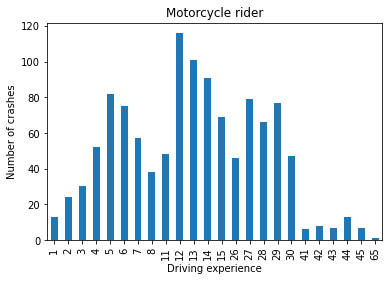

In [46]:
ARD7B_MR.plot(kind='bar')
plt.xlabel("Driving experience")
plt.ylabel("Number of crashes")
plt.title("Motorcycle rider")
plt.show()

A7 2: Motorcycle rider

In [47]:
ARD7B_CD=ARD7A_CD['Driving experience'].value_counts().sort_index()
ARD7B_CD

1      30
2      93
3      92
4     174
5     218
6     163
7     168
8      70
11    107
12    249
13    235
14    245
15    130
26     76
27    191
28    170
29    181
30     83
40      2
41     81
42    117
43    120
44    130
45     74
61      2
62      8
63      7
64     13
65      5
Name: Driving experience, dtype: int64

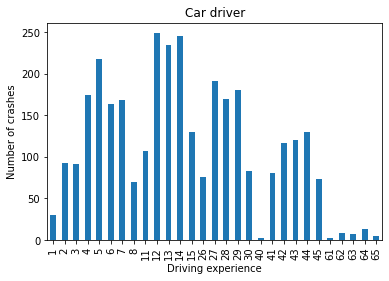

In [48]:
ARD7B_CD.plot(kind='bar')
plt.xlabel("Driving experience")
plt.ylabel("Number of crashes")
plt.title("Car driver")
plt.show()

A7 2: Car driver

In [49]:
ARD7B_PC=ARD7A_PC['Driving experience'].value_counts().sort_index()
ARD7B_PC

2      6
3      4
4      8
5      9
6      6
7      7
8      1
11     7
12    14
13    21
14    17
15     6
26    11
27    12
28    20
29    20
30    12
41     4
42     5
43     4
44    10
45     2
61     2
62     1
64     1
Name: Driving experience, dtype: int64

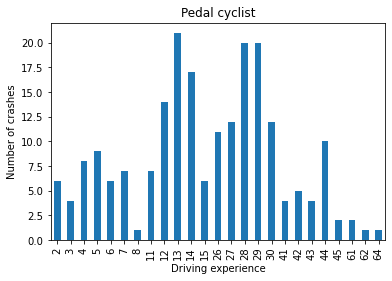

In [50]:
ARD7B_PC.plot(kind='bar')
plt.xlabel("Driving experience")
plt.ylabel("Number of crashes")
plt.title("Pedal cyclist")
plt.show()

In [51]:
ARD7B_OVD=ARD7A_OVD['Driving experience'].value_counts().sort_index()
ARD7B_OVD

2     2
3     1
4     2
5     2
7     2
8     1
11    2
12    1
13    2
14    1
15    1
27    2
29    4
43    3
64    2
65    1
Name: Driving experience, dtype: int64

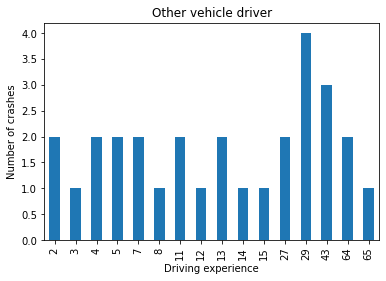

In [52]:
ARD7B_OVD.plot(kind='bar')
plt.xlabel("Driving experience")
plt.ylabel("Number of crashes")
plt.title("Other vehicle driver")
plt.show()

In [53]:
crash_per_year=ARD['Year'].value_counts().sort_index()
crash_per_year

2014     301
2015     939
2016     733
2017     957
2018    1108
2019    1173
2020     926
2021     685
Name: Year, dtype: int64

In [54]:
crash_per_year = pd.DataFrame(ARD['Year'].value_counts().reset_index().values, columns=["Year", "crashes"])
crash_per_year

,Year,crashes
0,2019,1173
1,2018,1108
2,2017,957
3,2015,939
4,2020,926
5,2016,733
6,2021,685
7,2014,301


In [55]:
crash_per_year=crash_per_year.sort_values('Year')
crash_per_year

,Year,crashes
7,2014,301
3,2015,939
5,2016,733
2,2017,957
1,2018,1108
0,2019,1173
4,2020,926
6,2021,685


Crash per year dataframe

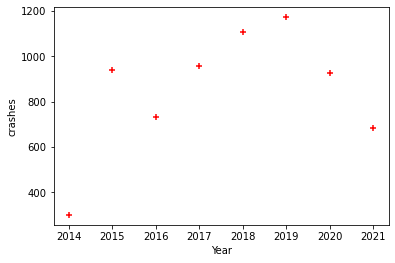

In [56]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('crashes')
#plt.scatter(df.area,df.price,color='red',marker='+')
plt.scatter(crash_per_year.Year,crash_per_year.crashes,color='red',marker='+')

In [57]:
crash_per_year['Year'] = crash_per_year['Year'].astype(int)

In [58]:
X81 = crash_per_year.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y81 = crash_per_year.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X81, Y81)  # perform linear regression
Y_pred_81 = linear_regressor.predict(X81)  # make predictions

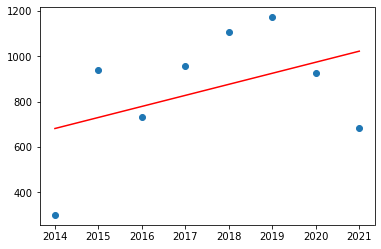

In [59]:
plt.scatter(X81, Y81)
plt.plot(X81, Y_pred_81, color='red')
plt.show()

A8 1: plotting linear regression

In [60]:
Year = crash_per_year.drop('crashes',axis='columns')
Year

,Year
7,2014
3,2015
5,2016
2,2017
1,2018
0,2019
4,2020
6,2021


In [61]:
crashes=crash_per_year['crashes']
crashes

7     301
3     939
5     733
2     957
1    1108
0    1173
4     926
6     685
Name: crashes, dtype: object

In [62]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(Year,crashes)

LinearRegression()

In [63]:
reg.predict([[2022]]) #it predicts there will be 1072 crashes in 2022

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1072.07142857])

A8 2: there will be 1072.07142857 crashes in 2022

starting polynomial regression

In [64]:
x_np= crash_per_year.iloc[:, 0].values
y_np = crash_per_year.iloc[:, 1].values
x_np=x_np.reshape(-1, 1)
x_np

array([[2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021]])

In [65]:
y_np

array([301, 939, 733, 957, 1108, 1173, 926, 685], dtype=object)

In [66]:
lin = LinearRegression()
lin.fit(x_np, y_np)

LinearRegression()

In [67]:
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x_np)

poly.fit(x_poly, y_np)
lin2 = LinearRegression()
lin2.fit(x_poly, y_np)

LinearRegression()

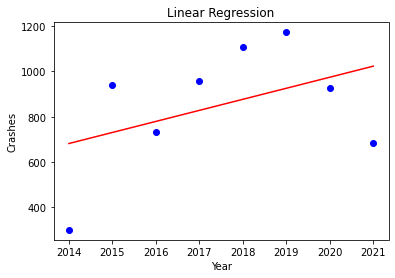

In [68]:
plt.scatter(x_np, y_np, color = 'blue')
  
plt.plot(x_np, lin.predict(x_np), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Crashes')
plt.show()

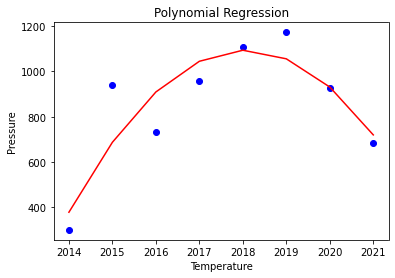

In [69]:
plt.scatter(x_np, y_np, color = 'blue')

plt.plot(x_np, lin2.predict(poly.fit_transform(x_np)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
  
plt.show() #this is a 2 degree polynomial

A8 3: better model is 2nd degree polynomial. Look at the line, it fits the dots better.

In [70]:
pred2 = 2022 #predicted value for 2022 using polynomial  is 324.57 crashes
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array)) 

array([422.42857134])

A8 4: Polynomial Regression predicted there will be 422.42857134 crashes in 2022

In [71]:
DE_and_Age={'Driving experience':ARD['Driving experience'],'Age':ARD['Age']}
DE_and_Age=pd.DataFrame(DE_and_Age)
DE_and_Age

,Driving experience,Age
5,3,19
8,3,0
9,12,47
10,7,24
11,29,52
...,...,...
9106,14,40
9112,15,46
9121,45,82
9129,43,84


In [72]:
DE_and_Age_weird=DE_and_Age.loc[ (DE_and_Age['Driving experience']> DE_and_Age['Age'] )]
DE_and_Age_weird

,Driving experience,Age
8,3,0
40,40,0
46,62,0
90,40,0
107,63,0
...,...,...
7830,2,0
8001,2,0
8196,5,0
8677,61,0


In [73]:
DE_and_Age = DE_and_Age.drop((DE_and_Age_weird.index)) #removing all the weird values
DE_and_Age

,Driving experience,Age
5,3,19
9,12,47
10,7,24
11,29,52
13,11,32
...,...,...
9106,14,40
9112,15,46
9121,45,82
9129,43,84


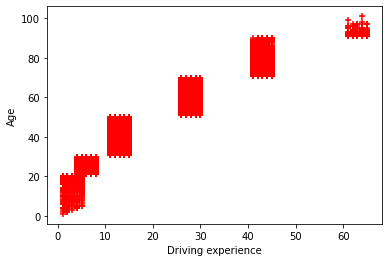

In [74]:
plt.xlabel('Driving experience')
plt.ylabel('Age')
plt.scatter(DE_and_Age['Driving experience'],DE_and_Age['Age'],color='red',marker='+')

In [75]:
new_DEA = DE_and_Age.drop('Age',axis='columns')
new_DEA

,Driving experience
5,3
9,12
10,7
11,29
13,11
...,...
9106,14
9112,15
9121,45
9129,43


In [76]:
Age = DE_and_Age.Age
Age

5       19
9       47
10      24
11      52
13      32
        ..
9106    40
9112    46
9121    82
9129    84
9131    82
Name: Age, Length: 6760, dtype: int64

In [77]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_DEA,Age)

LinearRegression()

In [78]:
DE_and_Age_weird=DE_and_Age_weird.drop('Age',axis='columns')
DE_and_Age_weird

,Driving experience
8,3
40,40
46,62
90,40
107,63
...,...
7830,2
8001,2
8196,5
8677,61


In [79]:
age_predict=reg.predict(DE_and_Age_weird)
age_predict

array([ 22.34974503,  75.61945575, 107.2933378 ,  75.61945575,
       108.73305971, 107.2933378 ,  23.78946694,  19.47030121,
       111.61250354,  23.78946694,  20.91002312, 110.17278163,
        22.34974503,  23.78946694,  22.34974503,  22.34974503,
        23.78946694,  23.78946694,  20.91002312,  22.34974503,
        20.91002312,  25.22918885,  23.78946694,  25.22918885,
        23.78946694,  25.22918885,  25.22918885,  22.34974503,
        23.78946694,  20.91002312,  20.91002312,  23.78946694,
        25.22918885,  25.22918885,  75.61945575,  25.22918885,
        23.78946694,  23.78946694,  25.22918885,  23.78946694,
        23.78946694,  25.22918885,  25.22918885,  23.78946694,
        23.78946694,  20.91002312,  23.78946694,  23.78946694,
       110.17278163,  20.91002312,  25.22918885,  22.34974503,
        22.34974503,  25.22918885,  23.78946694,  75.61945575,
        22.34974503,  20.91002312,  20.91002312,  25.22918885,
       105.85361589,  22.34974503])

In [80]:
DE_and_Age_weird['Age']=age_predict
DE_and_Age_weird.head(30)

,Driving experience,Age
8,3,22.349745
40,40,75.619456
46,62,107.293338
90,40,75.619456
107,63,108.733060
283,62,107.293338
371,4,23.789467
608,1,19.470301
713,65,111.612504
825,4,23.789467


Some samples of age prediction based on driving experience

PART B1

In [81]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [82]:
song_data=pd.read_csv('song_data.csv')
song_data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,4,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,4,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,4,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,4,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,3,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,3,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,3,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),2,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,3,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [83]:
song_data.shape

(18835, 15)

In [84]:
sd=song_data.drop(['song_name'],axis=1 )
sd

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,4,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,4,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,4,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,4,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,3,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,3,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,3,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,2,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,3,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [85]:
X = sd.drop('song_popularity', axis=1)
y = song_data['song_popularity']
X

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [86]:
y

0        4
1        4
2        4
3        4
4        3
        ..
18830    3
18831    3
18832    2
18833    3
18834    3
Name: song_popularity, Length: 18835, dtype: int64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [88]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
y_pred = classifier.predict(X_test)
y_pred

array([5, 4, 3, ..., 5, 4, 4], dtype=int64)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
print(classification_report(y_test, y_pred))

[[109  78 158 118  15]
 [ 70 204 240 177  18]
 [155 250 752 375  49]
 [ 87 127 325 979  37]
 [  8   6  22  13 337]]
              precision    recall  f1-score   support

           1       0.25      0.23      0.24       478
           2       0.31      0.29      0.30       709
           3       0.50      0.48      0.49      1581
           4       0.59      0.63      0.61      1555
           5       0.74      0.87      0.80       386

    accuracy                           0.51      4709
   macro avg       0.48      0.50      0.49      4709
weighted avg       0.50      0.51      0.50      4709



The accuracy is 0.51. It seems very difficult to predict song popularity.

<AxesSubplot:>

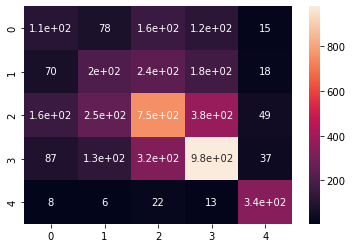

In [91]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

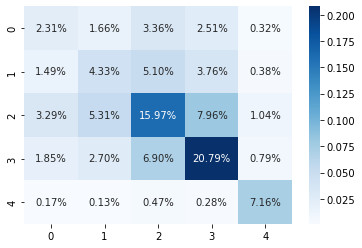

In [92]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

X axis actual values, Y axis predicted values. For each index we add plus one. For example index 0 is actually 1. We can see that this model is very bad at predicting song popularity.

PART B2

In [93]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [94]:
mc = pd.read_csv("Mall_Customers.csv")
mc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


PLOTTING BASED ON ANNUAL INCOME AND SPENDING SCORE

Text(0, 0.5, 'Spending Score (1-100)')

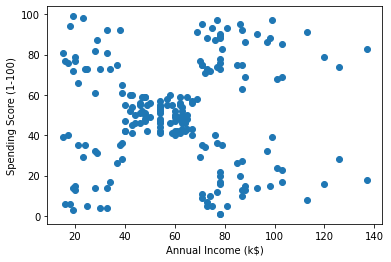

In [95]:
plt.scatter(mc['Annual Income (k$)'],mc['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [96]:
sse = [] #sum of squared error
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(mc[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


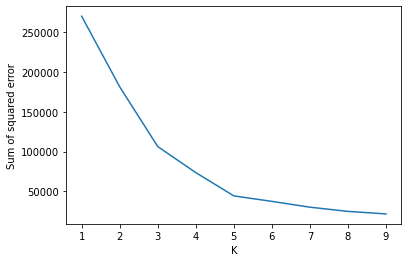

In [97]:
plt.xlabel('K') #plotting elbow plot
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse) #there are 5 clusters

Plotting elbow plot. There are 5 clusters.

Text(0, 0.5, 'Spending Score (1-100)')

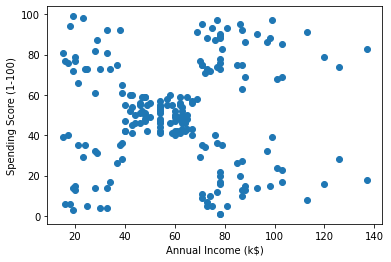

In [98]:
plt.scatter(mc['Annual Income (k$)'],mc['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [99]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(mc[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [100]:
mc['cluster']=y_predicted
mc.head(30)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1
5,6,Female,22,17,76,4
6,7,Female,35,18,6,1
7,8,Female,23,18,94,4
8,9,Male,64,19,3,1
9,10,Female,30,19,72,4


In [101]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

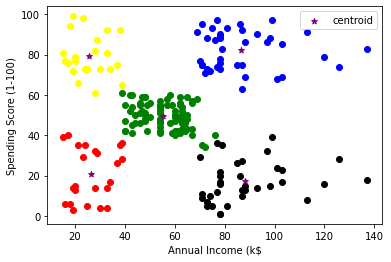

In [102]:
mc1=mc[mc.cluster==0]
mc2=mc[mc.cluster==1]
mc3=mc[mc.cluster==2]
mc4=mc[mc.cluster==3]
mc5=mc[mc.cluster==4]
plt.scatter(mc1['Annual Income (k$)'],mc1['Spending Score (1-100)'],color='green')
plt.scatter(mc2['Annual Income (k$)'],mc2['Spending Score (1-100)'],color='red')
plt.scatter(mc3['Annual Income (k$)'],mc3['Spending Score (1-100)'],color='black')
plt.scatter(mc4['Annual Income (k$)'],mc4['Spending Score (1-100)'],color='blue' )
plt.scatter(mc5['Annual Income (k$)'],mc5['Spending Score (1-100)'],color='yellow' )          
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Annual Income (k$')
plt.ylabel('Spending Score (1-100)')
plt.legend()

PLOTTING BASED ON AGE AND SPENDING SCORE

In [103]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(mc[['Age','Spending Score (1-100)']])
y_predicted

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [104]:
mc['cluster']=y_predicted
mc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [105]:
km.cluster_centers_

array([[43.05494505, 47.78021978],
       [42.95744681, 14.59574468],
       [29.56451613, 80.74193548]])

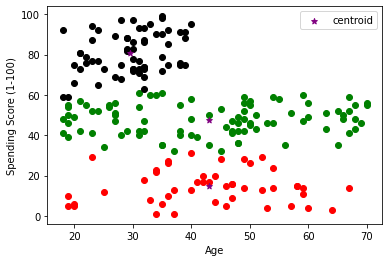

In [106]:
mc1=mc[mc.cluster==0]
mc2=mc[mc.cluster==1]
mc3=mc[mc.cluster==2]
plt.scatter(mc1['Age'],mc1['Spending Score (1-100)'],color='green')
plt.scatter(mc2['Age'],mc2['Spending Score (1-100)'],color='red')
plt.scatter(mc3['Age'],mc3['Spending Score (1-100)'],color='black')         
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()

After plotting 2 types of data. It seems that plotting based on age and spending score is more useful. Based on the plot, we can see that younger people spend more than older.
dataset link: https://www.kaggle.com/datasets/nelakurthisudheer/mall-customer-segmentation?resource=download